In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Excel2 dataWeb_scraps.csv')

In [3]:
df.head()



,Unnamed: 0,Price,Description,Skills,Bids,Verified,Days
0,0,$30 - $250,I am a Chinese business looking for a payment ...,Payment Gateway Integration\nWordPress,0 bids,VERIFIED,6 days left
1,1,$750 - $1500,Youtube and Facebook video advertisement to fu...,Audio Production\nVideo Production,0 bids,VERIFIED,6 days left
2,2,$18 / hr\n (Avg...,Hi! I’m looking for clients. I’m offering serv...,Data Entry\neCommerce\nShopify\nShopify Templa...,15 bids,VERIFIED,6 days left
3,3,$75\n (Avg Bid),I am looking for a skilled AR developer who ca...,Android\nC# Programming\niPhone\nMobile App De...,4 bids,VERIFIED,6 days left
4,4,$85\n (Avg Bid),Data Scraping and Lead Generation\n\nI am look...,Data Mining\nLead Generation\nPython\nWeb Scra...,1 bids,VERIFIED,6 days left


In [4]:
df = pd.read_csv('Excel2 dataWeb_scraps.csv', usecols=['Price', 'Bids', 'Days'])
df

,Price,Bids,Days
0,$30 - $250,0 bids,6 days left
1,$750 - $1500,0 bids,6 days left
2,$18 / hr\n (Avg...,15 bids,6 days left
3,$75\n (Avg Bid),4 bids,6 days left
4,$85\n (Avg Bid),1 bids,6 days left
...,...,...,...
195,$18\n (Avg Bid),2 bids,6 days left
196,$27\n (Avg Bid),23 bids,6 days left
197,$4 / hr\n (Avg ...,10 bids,6 days left
198,$54\n (Avg Bid),4 bids,6 days left


In [5]:
import re

# Convert the "Days" column to string type
df['Days'] = df['Days'].astype(str)

# Remove unwanted characters from the days columns and extract numeric values
df['Days'] = df['Days'].str.replace('\D', '', regex=True)

# Convert the "Days" column to numeric type
df['Days'] = pd.to_numeric(df['Days'])

# Print the data frame
print(df)

                                                 Price     Bids  Days
0                                           $30 - $250   0 bids     6
1                                         $750 - $1500   0 bids     6
2    $18 / hr\n                                (Avg...  15 bids     6
3       $75\n                                (Avg Bid)   4 bids     6
4       $85\n                                (Avg Bid)   1 bids     6
..                                                 ...      ...   ...
195     $18\n                                (Avg Bid)   2 bids     6
196     $27\n                                (Avg Bid)  23 bids     6
197  $4 / hr\n                                (Avg ...  10 bids     6
198     $54\n                                (Avg Bid)   4 bids     6
199                                        $152 - $455   0 bids     6

[200 rows x 3 columns]


In [6]:
#  DataFrame df with a "bids" column

# Remove unwanted characters and extract numeric values
df['Bids'] = df['Bids'].str.replace('\D', '', regex=True)

# Convert the "bids" column to numeric type
df['Bids'] = pd.to_numeric(df['Bids'])

# Print the DataFrame
print(df)

                                                 Price  Bids  Days
0                                           $30 - $250     0     6
1                                         $750 - $1500     0     6
2    $18 / hr\n                                (Avg...    15     6
3       $75\n                                (Avg Bid)     4     6
4       $85\n                                (Avg Bid)     1     6
..                                                 ...   ...   ...
195     $18\n                                (Avg Bid)     2     6
196     $27\n                                (Avg Bid)    23     6
197  $4 / hr\n                                (Avg ...    10     6
198     $54\n                                (Avg Bid)     4     6
199                                        $152 - $455     0     6

[200 rows x 3 columns]


In [7]:
df[['Price_Min', 'Price_Max']] = df['Price'].str.extract(r'\$(\d+)\s*-\s*\$(\d+)', expand=True)
df[['Price_Min', 'Price_Max']] = df[['Price_Min', 'Price_Max']].apply(pd.to_numeric)

In [8]:
# Clean and extract numeric values from single prices
df['Price_Single'] = df['Price'].str.extract(r'\$(\d+)', expand=False)
df['Price_Single'] = df['Price_Single'].apply(pd.to_numeric)


In [9]:
# Clean and extract numeric values from single prices
df['Price_Single'] = df['Price'].str.extract(r'\$(\d+)', expand=False)
df['Price_Single'] = df['Price_Single'].apply(pd.to_numeric)

In [10]:
df

,Price,Bids,Days,Price_Min,Price_Max,Price_Single
0,$30 - $250,0,6,30.0,250.0,30
1,$750 - $1500,0,6,750.0,1500.0,750
2,$18 / hr\n (Avg...,15,6,NaN,NaN,18
3,$75\n (Avg Bid),4,6,NaN,NaN,75
4,$85\n (Avg Bid),1,6,NaN,NaN,85
...,...,...,...,...,...,...
195,$18\n (Avg Bid),2,6,NaN,NaN,18
196,$27\n (Avg Bid),23,6,NaN,NaN,27
197,$4 / hr\n (Avg ...,10,6,NaN,NaN,4
198,$54\n (Avg Bid),4,6,NaN,NaN,54


In [11]:
selected_columns = ['Price_Single', 'Bids', 'Days']
df_selected = df[selected_columns].copy()

In [12]:
df_selected

,Price_Single,Bids,Days
0,30,0,6
1,750,0,6
2,18,15,6
3,75,4,6
4,85,1,6
...,...,...,...
195,18,2,6
196,27,23,6
197,4,10,6
198,54,4,6


#linear regression

In [19]:

X = df_selected[['Bids', 'Days']]  # Independent variables
y = df_selected['Price_Single']  # Dependent variable


In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 299244.1350154815
R-squared: -0.047242079588835306


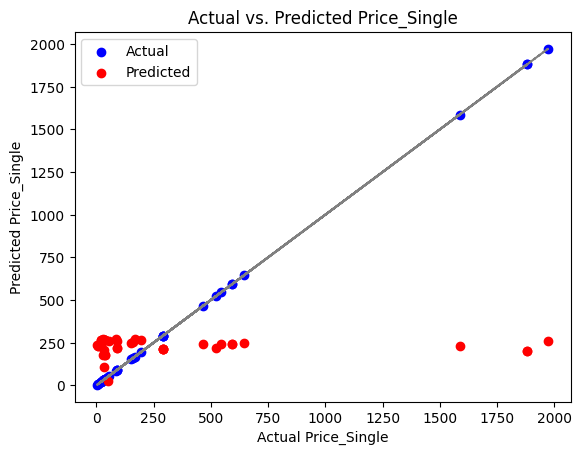

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')

plt.xlabel('Actual Price_Single')
plt.ylabel('Predicted Price_Single')
plt.title('Actual vs. Predicted Price_Single')


plt.plot(y_test, y_test, color='gray', linestyle='--')


plt.legend()


plt.show()
